In [88]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p


#es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 100



In [89]:
df = pd.read_csv('stroke.csv')


In [90]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [91]:
df['gender']=df['gender'].replace(['Male', 'Female', 'Other'],[1,2,3])
df['ever_married']=df['ever_married'].replace(['Yes', 'No'], [1,2])
df['work_type']=df['work_type'].replace(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'],[1,2,3,4,5])
df['Residence_type']=df['Residence_type'].replace(['Urban', 'Rural'], [1,2])
df['smoking_status']=df['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[1,2,3])
df['smoking_status']=df['smoking_status'].replace(['Unknown'],np.NaN)

In [92]:
bmi_mean=df.bmi.mean()
values={'bmi':int(bmi_mean)}
df=df.fillna(value=values)
df.bmi.isnull().any()

False

In [93]:
df=df.dropna()
df=df.drop('id', axis=1)

In [94]:
df_scaled = p.StandardScaler().fit_transform(df.iloc[:,:-1])

In [95]:
df_scaled[:,0]

array([-1.23801203,  0.80585413, -1.23801203, ...,  0.80585413,
        0.80585413, -1.23801203])

In [96]:
X_train, X_val, y_train, y_val = train_test_split(df_scaled, df.iloc[:,-1], train_size = 0.6, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size = 0.5, random_state=1)

In [97]:
model_small= Sequential()
model_small.add(Dense(4, activation = 'relu'))
model_small.add(Dense(2, activation = 'relu'))
model_small.add(Dense(1, activation = 'sigmoid'))

model_small.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_small =  model_small.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
67/67 [==============================] - 1s 4ms/step - loss: 0.4547 - accuracy: 0.9425 - val_loss: 0.3872 - val_accuracy: 0.9510
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.9425 - val_loss: 0.3077 - val_accuracy: 0.9510
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.9425 - val_loss: 0.2560 - val_accuracy: 0.9510
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.9425 - val_loss: 0.2263 - val_accuracy: 0.9510
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9425 - val_loss: 0.2093 - val_accuracy: 0.9510
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9425 - val_loss: 0.1995 - val_accuracy: 0.9510
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9425 - val_loss: 0.1937 - val_accuracy: 0.9510
Epoch 8/100
6

Epoch 59/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1827 - accuracy: 0.9425 - val_loss: 0.1695 - val_accuracy: 0.9510
Epoch 60/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.9425 - val_loss: 0.1694 - val_accuracy: 0.9510
Epoch 61/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9425 - val_loss: 0.1695 - val_accuracy: 0.9510
Epoch 62/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9425 - val_loss: 0.1694 - val_accuracy: 0.9510
Epoch 63/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9425 - val_loss: 0.1695 - val_accuracy: 0.9510
Epoch 64/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.9425 - val_loss: 0.1696 - val_accuracy: 0.9510
Epoch 65/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1822 - accuracy: 0.9425 - val_loss: 0.1693 - val_accuracy: 0.9510
Epoch 

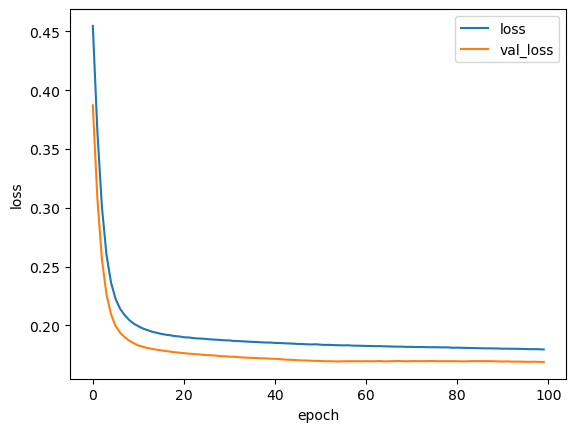

In [98]:
hist_small = pd.DataFrame(history_small.history)

plt.plot(hist_small.loss, label = "loss")
plt.plot(hist_small.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('mala_loss.png')

In [99]:
model_medium = Sequential()
model_medium.add(Dense(16, activation = 'relu'))
model_medium.add(Dense(8, activation = 'relu'))
model_medium.add(Dense(4, activation = 'relu'))
model_medium.add(Dense(2, activation = 'relu'))
model_medium.add(Dense(1, activation = 'sigmoid'))

model_medium.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_medium =  model_medium.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
67/67 [==============================] - 1s 4ms/step - loss: 0.7216 - accuracy: 0.6573 - val_loss: 0.6061 - val_accuracy: 0.8669
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.9158 - val_loss: 0.3465 - val_accuracy: 0.9356
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.9402 - val_loss: 0.2192 - val_accuracy: 0.9510
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.9425 - val_loss: 0.1972 - val_accuracy: 0.9510
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9425 - val_loss: 0.1898 - val_accuracy: 0.9510
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9425 - val_loss: 0.1845 - val_accuracy: 0.9510
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9425 - val_loss: 0.1812 - val_accuracy: 0.9510
Epoch 8/100
6

Epoch 59/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9495 - val_loss: 0.1767 - val_accuracy: 0.9440
Epoch 60/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9514 - val_loss: 0.1756 - val_accuracy: 0.9468
Epoch 61/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9514 - val_loss: 0.1802 - val_accuracy: 0.9426
Epoch 62/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9514 - val_loss: 0.1806 - val_accuracy: 0.9426
Epoch 63/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1527 - accuracy: 0.9518 - val_loss: 0.1767 - val_accuracy: 0.9454
Epoch 64/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.9514 - val_loss: 0.1791 - val_accuracy: 0.9426
Epoch 65/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9514 - val_loss: 0.1815 - val_accuracy: 0.9440
Epoch 

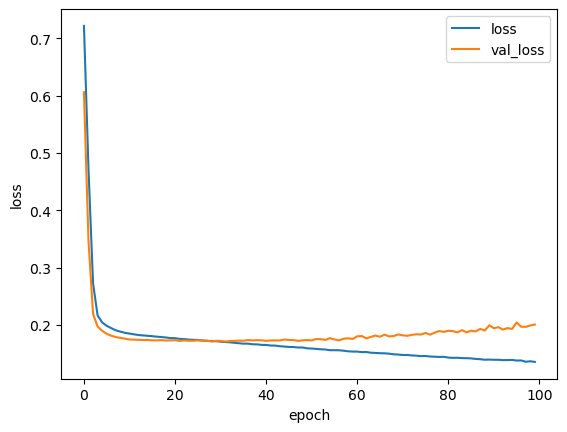

In [100]:
hist_medium = pd.DataFrame(history_medium.history)

plt.plot(hist_medium.loss, label = "loss")
plt.plot(hist_medium.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('srednia_loss.png')


In [101]:
model_big = Sequential()
model_big.add(Dense(64, activation = 'relu'))
model_big.add(Dense(32, activation = 'relu'))
model_big.add(Dense(16, activation = 'relu'))
model_big.add(Dense(8, activation = 'relu'))
model_big.add(Dense(4, activation = 'relu'))
model_big.add(Dense(2, activation = 'relu'))
model_big.add(Dense(1, activation = 'sigmoid'))

model_big.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_big =  model_big.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
67/67 [==============================] - 1s 4ms/step - loss: 0.3463 - accuracy: 0.9425 - val_loss: 0.1961 - val_accuracy: 0.9510
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9425 - val_loss: 0.1761 - val_accuracy: 0.9510
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9425 - val_loss: 0.1723 - val_accuracy: 0.9510
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9425 - val_loss: 0.1705 - val_accuracy: 0.9510
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9425 - val_loss: 0.1704 - val_accuracy: 0.9510
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9425 - val_loss: 0.1697 - val_accuracy: 0.9510
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9425 - val_loss: 0.1679 - val_accuracy: 0.9510
Epoch 8/100
6

Epoch 59/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9710 - val_loss: 0.3112 - val_accuracy: 0.9342
Epoch 60/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9715 - val_loss: 0.3311 - val_accuracy: 0.9398
Epoch 61/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9705 - val_loss: 0.3149 - val_accuracy: 0.9356
Epoch 62/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9705 - val_loss: 0.3272 - val_accuracy: 0.9020
Epoch 63/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9715 - val_loss: 0.3535 - val_accuracy: 0.9314
Epoch 64/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9719 - val_loss: 0.3532 - val_accuracy: 0.9258
Epoch 65/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9701 - val_loss: 0.3505 - val_accuracy: 0.9146
Epoch 

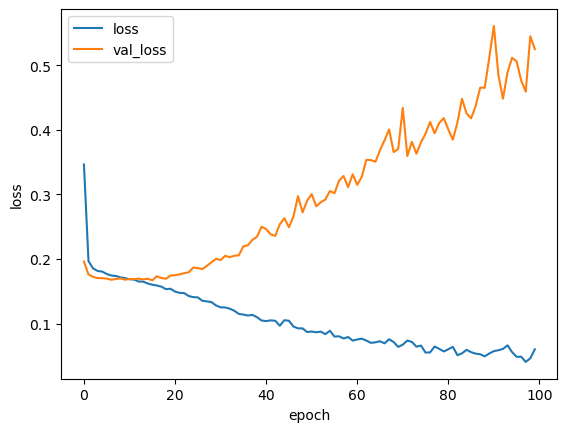

In [102]:
hist_big = pd.DataFrame(history_big.history)

plt.plot(hist_big.loss, label = "loss")
plt.plot(hist_big.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('duza_loss.png')

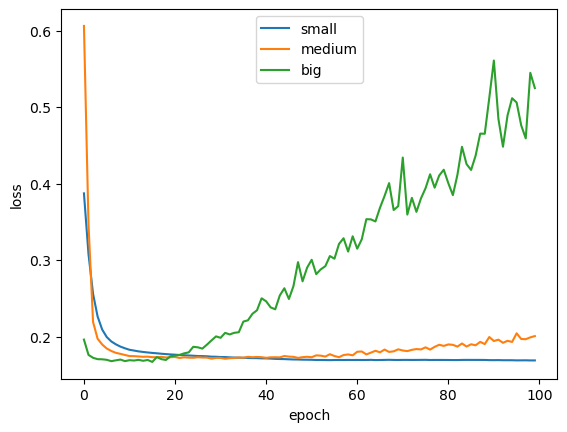

In [103]:
plt.plot(hist_small.val_loss, label = "small")
plt.plot(hist_medium.val_loss, label = "medium")
plt.plot(hist_big.val_loss, label = "big")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('f_straty.png')

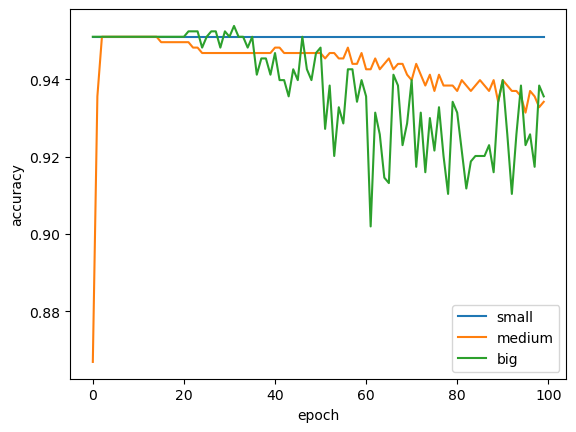

In [104]:
plt.plot(hist_small.val_accuracy, label = "small")
plt.plot(hist_medium.val_accuracy, label = "medium")
plt.plot(hist_big.val_accuracy, label = "big")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.savefig('accuracy_sieci.png')

In [105]:
model_medium_2 = Sequential()
model_medium_2.add(Dense(16, activation = 'relu', kernel_regularizer='l2'))
model_medium_2.add(Dense(8, activation = 'relu', kernel_regularizer='l2'))
model_medium_2.add(Dense(4, activation = 'relu', kernel_regularizer='l2'))
model_medium_2.add(Dense(2, activation = 'relu', kernel_regularizer='l2'))
model_medium_2.add(Dense(1, activation = 'sigmoid'))

model_medium_2.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_medium_2 =  model_medium_2.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
67/67 [==============================] - 2s 6ms/step - loss: 1.0132 - accuracy: 0.7471 - val_loss: 0.9470 - val_accuracy: 0.9160
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.9007 - accuracy: 0.9285 - val_loss: 0.8538 - val_accuracy: 0.9510
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.8154 - accuracy: 0.9420 - val_loss: 0.7753 - val_accuracy: 0.9510
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.7439 - accuracy: 0.9425 - val_loss: 0.7095 - val_accuracy: 0.9510
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.9425 - val_loss: 0.6549 - val_accuracy: 0.9510
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6348 - accuracy: 0.9425 - val_loss: 0.6094 - val_accuracy: 0.9510
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.9425 - val_loss: 0.5711 - val_accuracy: 0.9510
Epoch 8/100
6

Epoch 59/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9425 - val_loss: 0.2071 - val_accuracy: 0.9510
Epoch 60/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9425 - val_loss: 0.2063 - val_accuracy: 0.9510
Epoch 61/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9425 - val_loss: 0.2056 - val_accuracy: 0.9510
Epoch 62/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9425 - val_loss: 0.2049 - val_accuracy: 0.9510
Epoch 63/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2249 - accuracy: 0.9425 - val_loss: 0.2042 - val_accuracy: 0.9510
Epoch 64/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9425 - val_loss: 0.2037 - val_accuracy: 0.9510
Epoch 65/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9425 - val_loss: 0.2032 - val_accuracy: 0.9510
Epoch 

In [106]:
model_big_2 = Sequential()
model_big_2.add(Dense(64, activation = 'relu',kernel_regularizer='l1'))
model_big_2.add(Dense(32, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(16, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(8, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(4, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(2, activation = 'relu', kernel_regularizer='l1'))
model_big_2.add(Dense(1, activation = 'sigmoid'))

model_big_2.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_big_2 =  model_big_2.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
67/67 [==============================] - 2s 5ms/step - loss: 4.3853 - accuracy: 0.9425 - val_loss: 3.3172 - val_accuracy: 0.9510
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 2.5386 - accuracy: 0.9425 - val_loss: 1.8343 - val_accuracy: 0.9510
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 1.3707 - accuracy: 0.9425 - val_loss: 0.9456 - val_accuracy: 0.9510
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.7368 - accuracy: 0.9425 - val_loss: 0.5603 - val_accuracy: 0.9510
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.9425 - val_loss: 0.4333 - val_accuracy: 0.9510
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.9425 - val_loss: 0.3783 - val_accuracy: 0.9510
Epoch 7/100
67/67 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.9425 - val_loss: 0.3466 - val_accuracy: 0.9510
Epoch 8/100
6

Epoch 59/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2696 - accuracy: 0.9425 - val_loss: 0.2509 - val_accuracy: 0.9510
Epoch 60/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.9425 - val_loss: 0.2505 - val_accuracy: 0.9510
Epoch 61/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9425 - val_loss: 0.2510 - val_accuracy: 0.9510
Epoch 62/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2686 - accuracy: 0.9425 - val_loss: 0.2499 - val_accuracy: 0.9510
Epoch 63/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.9425 - val_loss: 0.2495 - val_accuracy: 0.9510
Epoch 64/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.9425 - val_loss: 0.2489 - val_accuracy: 0.9510
Epoch 65/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9425 - val_loss: 0.2480 - val_accuracy: 0.9510
Epoch 

In [107]:
model_medium_3 = Sequential()
model_medium_3.add(Dense(16, activation = 'relu'))
model_medium_3.add(BatchNormalization())
model_medium_3.add(Dropout(0.2))
model_medium_3.add(Dense(8, activation = 'relu'))
model_medium_3.add(Dense(4, activation = 'relu'))
model_medium_3.add(Dense(2, activation = 'relu'))
model_medium_3.add(Dense(1, activation = 'sigmoid'))

model_medium_3.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_medium_3 =  model_medium_3.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
67/67 [==============================] - 1s 4ms/step - loss: 0.9730 - accuracy: 0.1795 - val_loss: 0.6961 - val_accuracy: 0.6499
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.7190 - accuracy: 0.5993 - val_loss: 0.6455 - val_accuracy: 0.9202
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.8209 - val_loss: 0.6180 - val_accuracy: 0.9454
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.9154 - val_loss: 0.5941 - val_accuracy: 0.9510
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 0.5890 - accuracy: 0.9364 - val_loss: 0.5720 - val_accuracy: 0.9510
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.9411 - val_loss: 0.5510 - val_accuracy: 0.9510
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.9411 - val_loss: 0.5310 - val_accuracy: 0.9510
Epoch 8/100
6

Epoch 59/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9420 - val_loss: 0.2075 - val_accuracy: 0.9524
Epoch 60/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.9434 - val_loss: 0.2063 - val_accuracy: 0.9524
Epoch 61/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9425 - val_loss: 0.2068 - val_accuracy: 0.9524
Epoch 62/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9425 - val_loss: 0.2061 - val_accuracy: 0.9524
Epoch 63/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9439 - val_loss: 0.2047 - val_accuracy: 0.9524
Epoch 64/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9430 - val_loss: 0.2032 - val_accuracy: 0.9524
Epoch 65/100
67/67 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9425 - val_loss: 0.2027 - val_accuracy: 0.9524
Epoch 

In [108]:
model_big_3 = Sequential()
model_big_3.add(Dense(64, activation = 'relu'))
model_big_3.add(BatchNormalization())
model_big_3.add(Dropout(0.2))
model_big_3.add(Dense(32, activation = 'relu'))
model_big_3.add(Dense(16, activation = 'relu'))
model_big_3.add(Dense(8, activation = 'relu'))
model_big_3.add(Dense(4, activation = 'relu'))
model_big_3.add(Dense(2, activation = 'relu'))
model_big_3.add(Dense(1, activation = 'sigmoid'))

model_big_3.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])
history_big_3 =  model_big_3.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_test, y_test))

Epoch 1/100
67/67 [==============================] - 2s 5ms/step - loss: 0.5592 - accuracy: 0.9425 - val_loss: 0.4186 - val_accuracy: 0.9510
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9425 - val_loss: 0.2275 - val_accuracy: 0.9510
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.9425 - val_loss: 0.1825 - val_accuracy: 0.9510
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1855 - accuracy: 0.9425 - val_loss: 0.1861 - val_accuracy: 0.9510
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1845 - accuracy: 0.9425 - val_loss: 0.1698 - val_accuracy: 0.9510
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.9425 - val_loss: 0.1738 - val_accuracy: 0.9510
Epoch 7/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.9425 - val_loss: 0.1699 - val_accuracy: 0.9510
Epoch 8/100
6

Epoch 59/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9425 - val_loss: 0.1778 - val_accuracy: 0.9468
Epoch 60/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 0.9439 - val_loss: 0.1804 - val_accuracy: 0.9496
Epoch 61/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1505 - accuracy: 0.9439 - val_loss: 0.1838 - val_accuracy: 0.9510
Epoch 62/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1449 - accuracy: 0.9430 - val_loss: 0.1840 - val_accuracy: 0.9510
Epoch 63/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1467 - accuracy: 0.9416 - val_loss: 0.1851 - val_accuracy: 0.9496
Epoch 64/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.9425 - val_loss: 0.1810 - val_accuracy: 0.9524
Epoch 65/100
67/67 [==============================] - 0s 3ms/step - loss: 0.1409 - accuracy: 0.9439 - val_loss: 0.1825 - val_accuracy: 0.9524
Epoch 

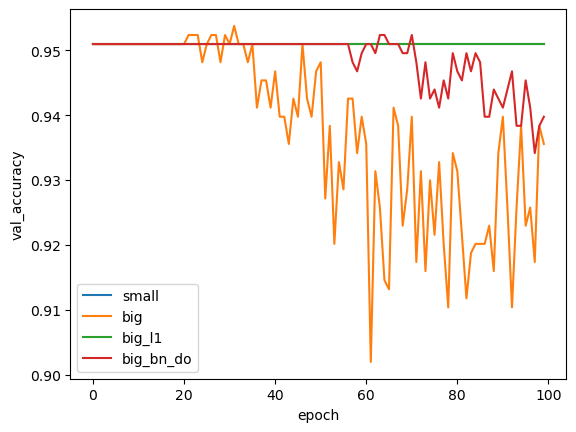

In [110]:
hist_big_2 = pd.DataFrame(history_big_2.history)
hist_big_3 = pd.DataFrame(history_big_3.history)

plt.plot(hist_small.val_accuracy, label = 'small')
plt.plot(hist_big.val_accuracy, label = "big")
plt.plot(hist_big_2.val_accuracy, label = "big_l1")
plt.plot(hist_big_3.val_accuracy, label = "big_bn_do")


plt.xlabel("epoch")
plt.ylabel("val_accuracy")
plt.legend()
plt.savefig('big_vers_acc')


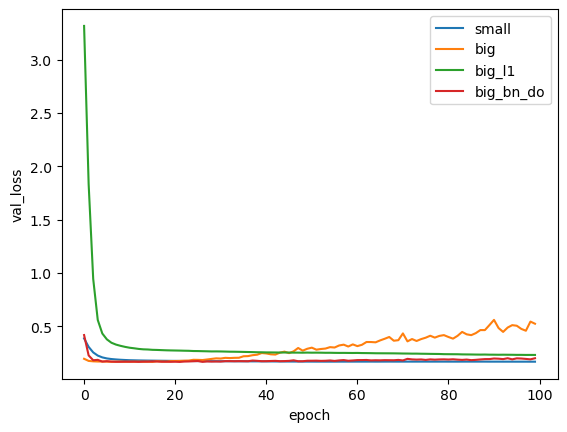

In [111]:
plt.plot(hist_small.val_loss, label = 'small')
plt.plot(hist_big.val_loss, label = "big")
plt.plot(hist_big_2.val_loss, label = "big_l1")
plt.plot(hist_big_3.val_loss, label = "big_bn_do")


plt.xlabel("epoch")
plt.ylabel("val_loss")
plt.legend()
plt.savefig('big_vers_loss')


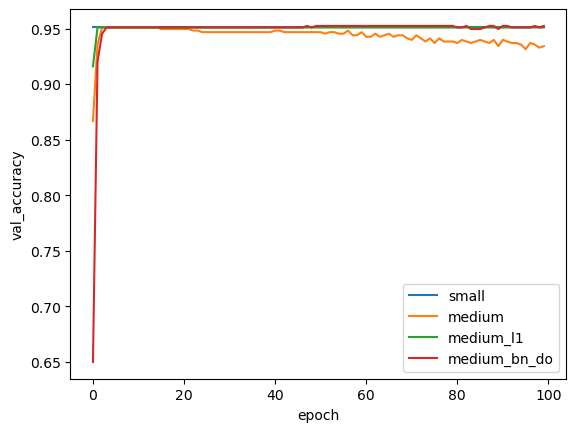

In [112]:
hist_medium_2 = pd.DataFrame(history_medium_2.history)
hist_medium_3 = pd.DataFrame(history_medium_3.history)

plt.plot(hist_small.val_accuracy, label = 'small')
plt.plot(hist_medium.val_accuracy, label = "medium")
plt.plot(hist_medium_2.val_accuracy, label = "medium_l1")
plt.plot(hist_medium_3.val_accuracy, label = "medium_bn_do")


plt.xlabel("epoch")
plt.ylabel("val_accuracy")
plt.legend()
plt.savefig('medium_vers_acc')

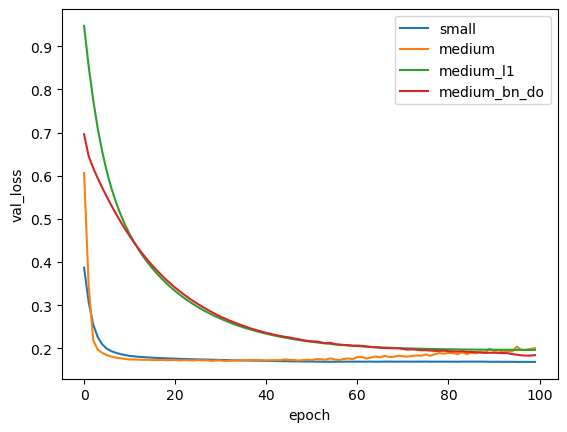

In [113]:
plt.plot(hist_small.val_loss, label = 'small')
plt.plot(hist_medium.val_loss, label = "medium")
plt.plot(hist_medium_2.val_loss, label = "medium_l1")
plt.plot(hist_medium_3.val_loss, label = "medium_bn_do")


plt.xlabel("epoch")
plt.ylabel("val_loss")
plt.legend()
plt.savefig('med_vers_val_loss')

In [114]:
output = model_small.evaluate(X_test, y_test)
output=model_medium.evaluate(X_test, y_test)
output = model_big.evaluate(X_test, y_test)

output = model_medium_2.evaluate(X_test, y_test)
output = model_medium_3.evaluate(X_test, y_test)
output = model_big_2.evaluate(X_test, y_test)
output = model_big_3.evaluate(X_test, y_test)


23/23 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.9398
